# Project: Decision Trees
## Name: Melody Goldanloo

In [44]:
#Example of supress warnings for Numpy version out of range (optional)
import warnings
warnings.filterwarnings("ignore", category=Warning)
warnings.simplefilter(action='ignore', category=FutureWarning)

#Some recommended libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# The Dataset
- The Wine Quality dataset contains samples with features representing various chemical properties (e.g., acidity, residual sugar, alcohol content).
- The target variable is a quality rating on a scale from 0 to 10.

In [45]:
# Load the Wine Quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, delimiter=";")

# Data Preprocessing
### Exploration

In [46]:
# Exploration
    # Descriptive statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [47]:
    # Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Visualization

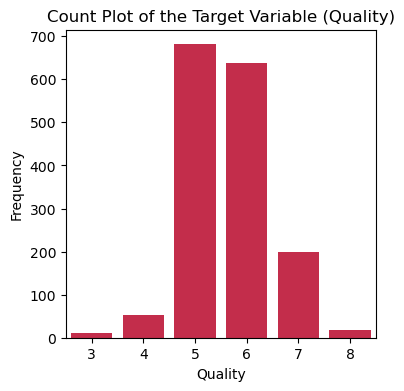

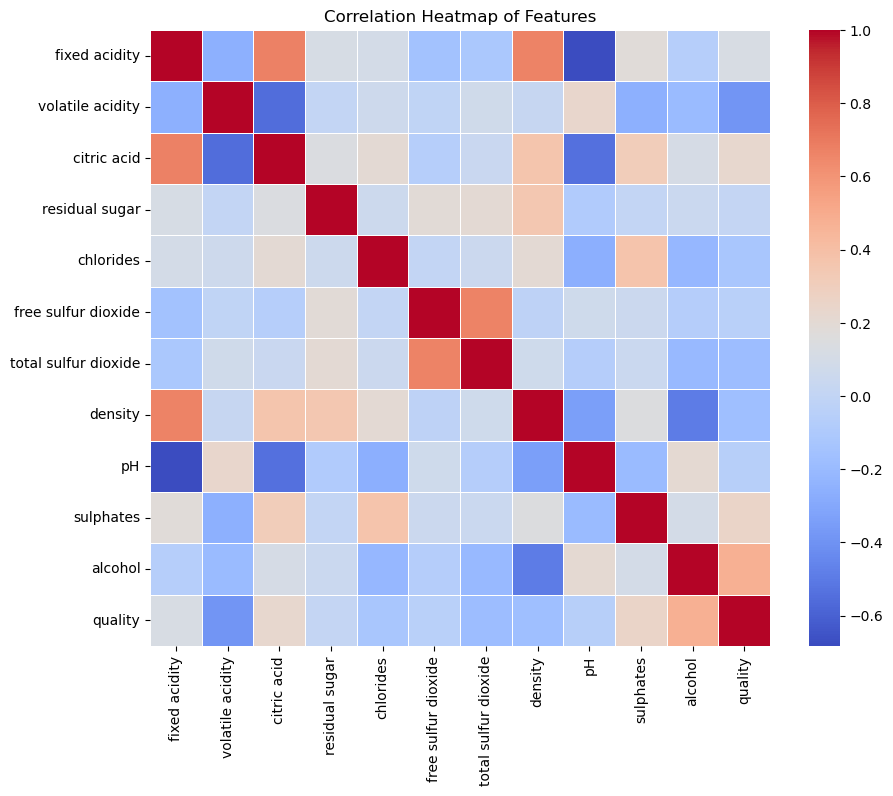

<Figure size 1000x800 with 0 Axes>

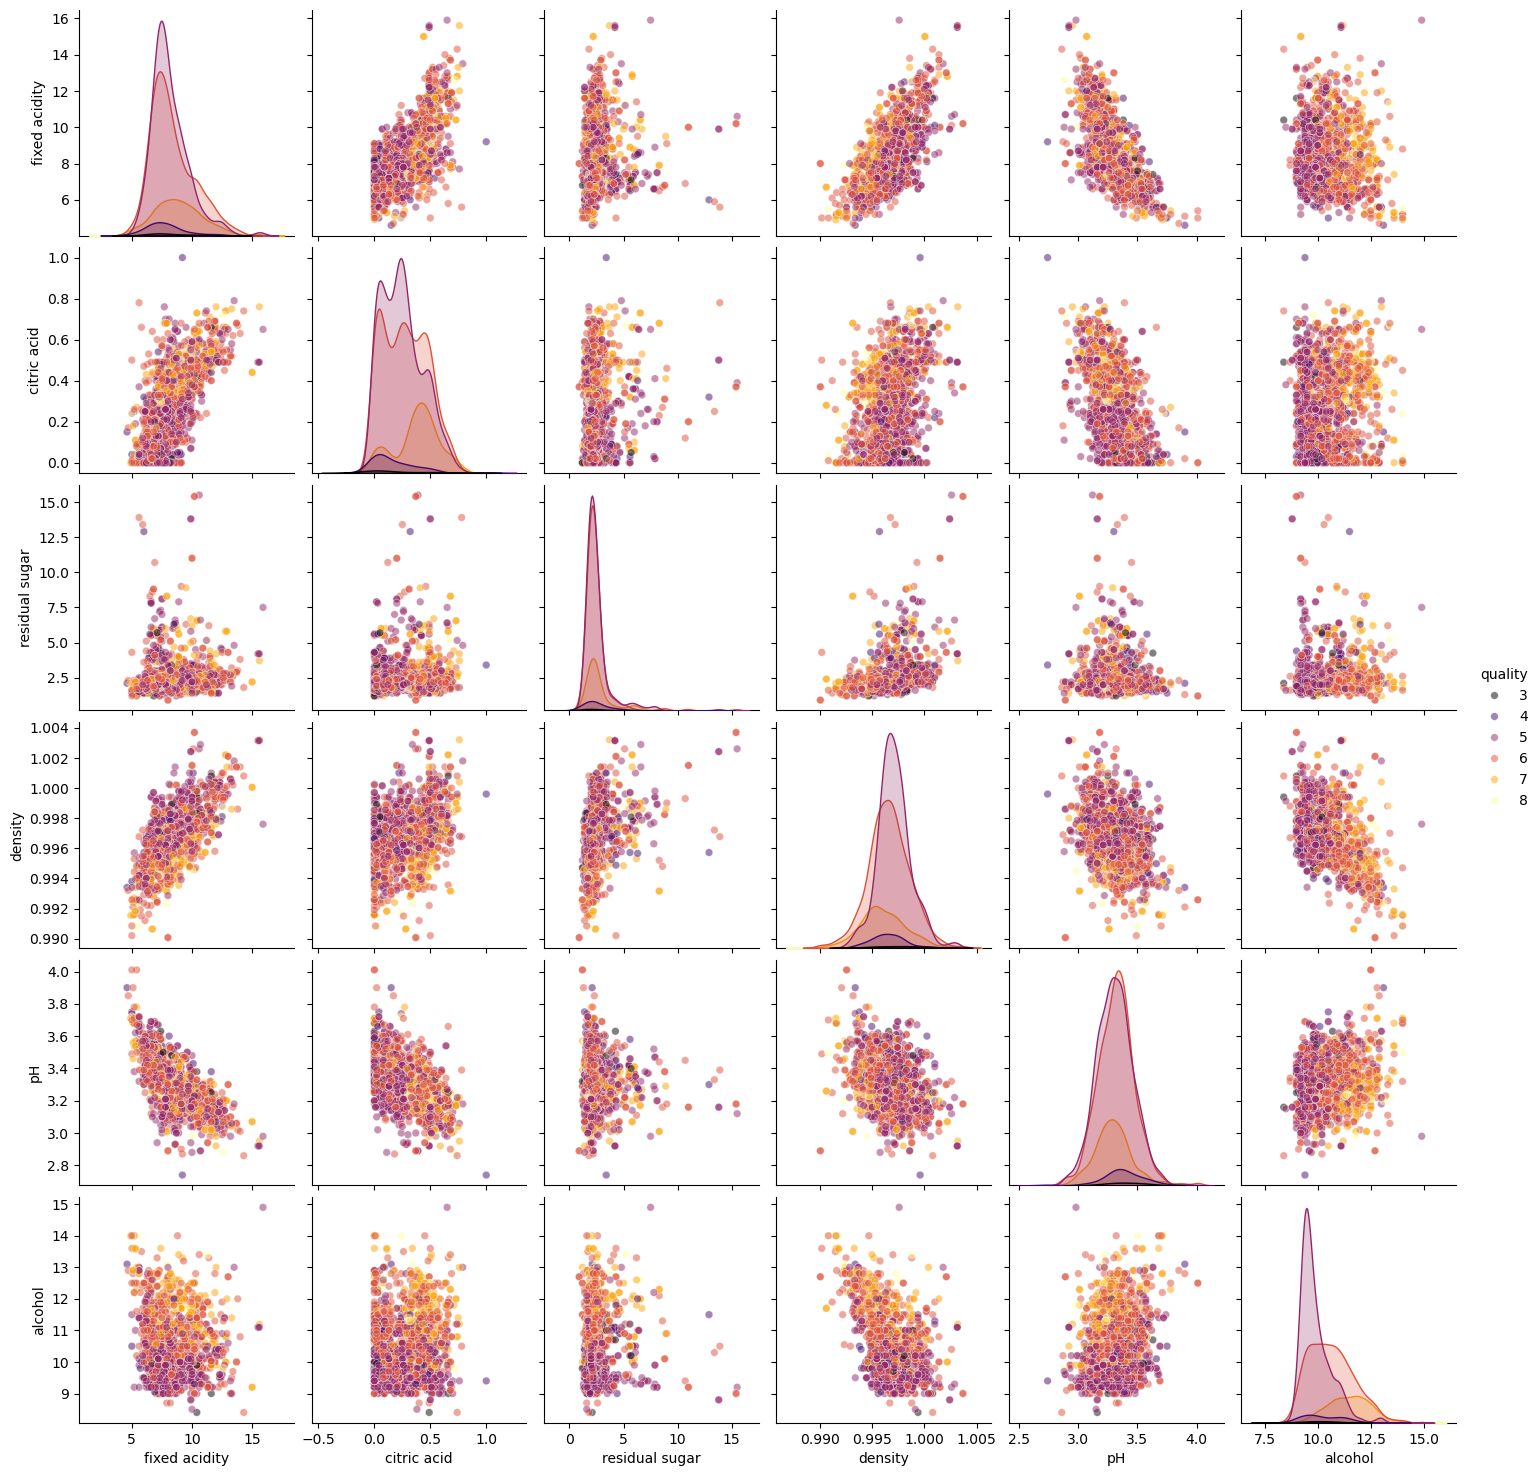

In [48]:
# Distribution of target variable (counts) (wine quality)
plt.figure(figsize=(4, 4))
sns.countplot(x='quality', data=df, color='crimson')
plt.title('Count Plot of the Target Variable (Quality)')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

# Heat map
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()
# none of the variables appear to have any more correlations than the other.

#looking at the matrix to see
#strong_correlations = correlation_matrix[correlation_matrix.abs() > 0.5]
#print(strong_correlations)

selected_features = ['fixed acidity', 'citric acid', 'residual sugar', 'quality', 'density', 'pH', 'alcohol']

# Create pair plots for the selected features
plt.figure(figsize=(10, 8))
sns.pairplot(df[selected_features], hue='quality', palette='inferno', markers='o', plot_kws={'s': 30, 'alpha': 0.5})
plt.show() 

### Missing Values & Duplicates

In [49]:
# Check for missing values
df.isnull().sum()
# no missing values!

# Check for duplicates
df.duplicated().sum()
# 240 duplicates
df = df.drop_duplicates()
# Check again
df.duplicated().sum()
# No there are no duplicates!

0

### Standardization & Test-Train Split

In [50]:
# Separate features and target
X = df.drop(columns=['quality'])  # explanatory
y = df['quality']  # Target/Response

# Encoding Categorical Variables
# No categorical variables to encode

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

# Building the Decision Tree Model

In [51]:
#Initialize the DT classifier model object and train it
#Note, we set random_state to a fixed integer to obtain a consistent result
#Other params: max_depth controls the depth of the tree (default is None) 
clf_dt = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)
clf_dt.fit(X_train, y_train)

#Make predictions
y_pred = clf_dt.predict(X_test)

# Evaluating the Model
Calculate metrics such as accuracy, precision, recall, F1 score, and confusion matrix to evaluate the model.

In [56]:
print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Precision Score:", precision_score(y_test, y_pred, average='macro'))
    # Precision measures the proportion of true positives among all predicted positives
print("Recall Score:", recall_score(y_test, y_pred, average='macro'))
    # Recall measures the proportion of true positives among all actual positives
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
    # F1 score is the mean of precision and recall
print("Confusion Matrix:", '\n' , confusion_matrix(y_test, y_pred))
print('\n', "Classification Report:", '\n',classification_report(y_test, y_pred))

Decision Tree Performance:
Accuracy: 0.6029411764705882
Precision Score: 0.28822483398627435
Recall Score: 0.3013436510422104
F1 Score: 0.2945751307733098
Confusion Matrix: 
 [[ 0  0  4  0  0  0]
 [ 0  0  7  4  0  0]
 [ 0  1 89 27  3  0]
 [ 0  3 28 60 12  0]
 [ 0  0  1 15 15  0]
 [ 0  0  0  2  1  0]]

 Classification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        11
           5       0.69      0.74      0.71       120
           6       0.56      0.58      0.57       103
           7       0.48      0.48      0.48        31
           8       0.00      0.00      0.00         3

    accuracy                           0.60       272
   macro avg       0.29      0.30      0.29       272
weighted avg       0.57      0.60      0.59       272



## For the Model Selection Project, you will STOP HERE! 
During Units 4, 5, and 6, we will explore and learn additional techniques, and then revisit these projects to apply the below:
- Model evaluation and parameter tuning
- Explanatory visualizations and package your results with data storytelling

# Tuning Model Parameters - Bagging (Completed in Unit 4)

In [ ]:
#Insert Code Here

# Evaluating the Tuned Model - Bagging (Completed in Unit 4)

In [ ]:
#Insert Code Here

# Visualizing Results (Completed in Units 4 and 6)

In [ ]:
#Insert Code Here